In [1]:
!pip install imblearn

In [2]:
#import all the libraries i'll be using here
import pandas as pd
from scipy.io import arff #For import the arff file
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,LabelEncoder
##from google.colab import drive
##drive.mount('/content/drive') 
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestClassifier,IsolationForest
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from mlxtend.evaluate import bias_variance_decomp
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,plot_confusion_matrix
from imblearn.pipeline import Pipeline as imbPipeline

In [3]:
data = arff.loadarff('phpfGCaQC.arff')
data= pd.DataFrame(data[0])
data.head()

,click,impression,url_hash,ad_id,advertiser_id,depth,position,query_id,keyword_id,title_id,description_id,user_id
0,b'0',1.0,1.071003e+19,8343295.0,11700.0,3.0,3.0,7702266.0,21264.0,27892.0,1559.0,0.0
1,b'1',1.0,1.736385e+19,20017077.0,23798.0,1.0,1.0,93079.0,35498.0,4.0,36476.0,562934.0
2,b'0',1.0,8.915473e+18,21348354.0,36654.0,1.0,1.0,10981.0,19975.0,36105.0,33292.0,11621116.0
3,b'0',1.0,4.426693e+18,20366086.0,33280.0,3.0,3.0,0.0,5942.0,4057.0,4390.0,8778348.0
4,b'0',1.0,1.157260e+19,6803526.0,10790.0,2.0,1.0,9881978.0,60593.0,25242.0,1679.0,12118311.0


In [4]:
data.shape

(39948, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39948 entries, 0 to 39947
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   click           39948 non-null  object 
 1   impression      39948 non-null  float64
 2   url_hash        39948 non-null  float64
 3   ad_id           39948 non-null  float64
 4   advertiser_id   39948 non-null  float64
 5   depth           39948 non-null  float64
 6   position        39948 non-null  float64
 7   query_id        39948 non-null  float64
 8   keyword_id      39948 non-null  float64
 9   title_id        39948 non-null  float64
 10  description_id  39948 non-null  float64
 11  user_id         39948 non-null  float64
dtypes: float64(11), object(1)
memory usage: 3.7+ MB


In [6]:
label=LabelEncoder()
data['click']=label.fit_transform(data['click'])
data.tail()
data.dtypes 

click               int32
impression        float64
url_hash          float64
ad_id             float64
advertiser_id     float64
depth             float64
position          float64
query_id          float64
keyword_id        float64
title_id          float64
description_id    float64
user_id           float64
dtype: object

In [7]:
data.duplicated().sum() 

22

In [8]:
data=data.drop_duplicates(keep='first')

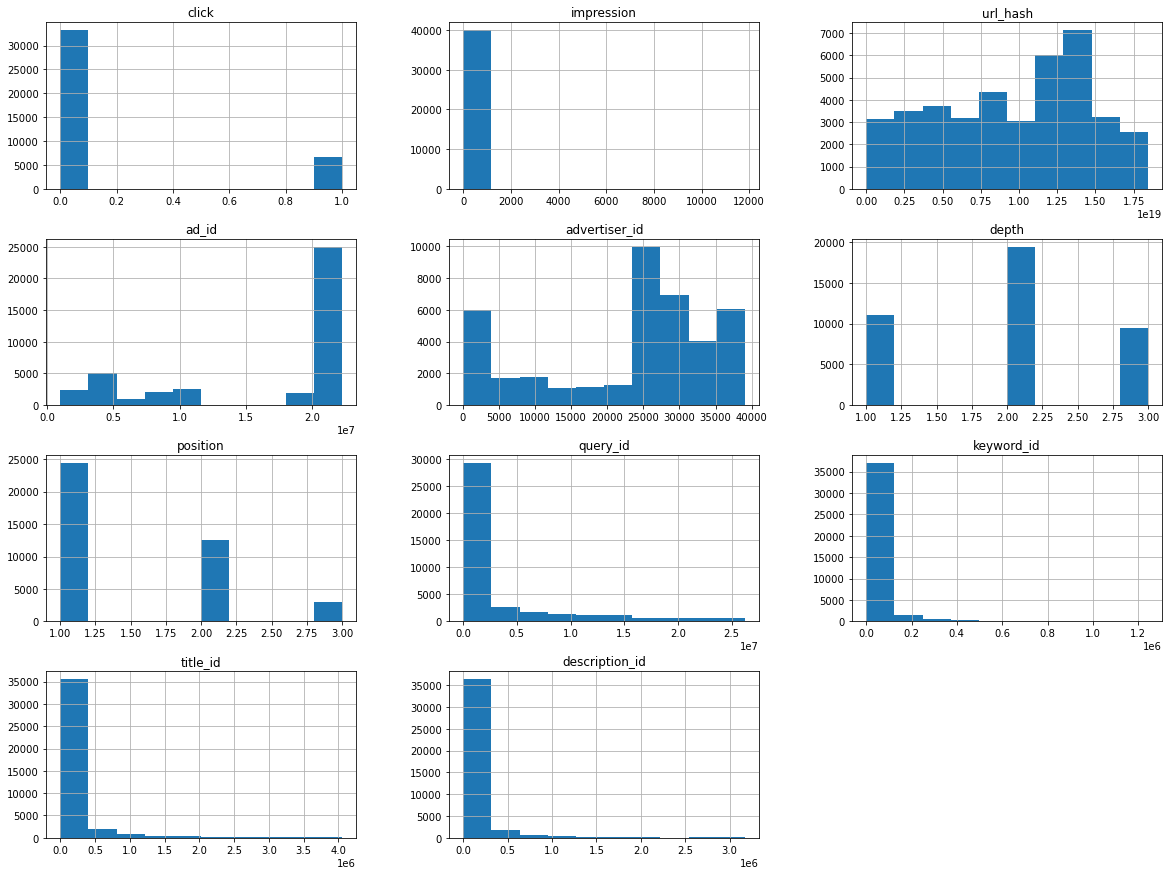

In [9]:
data.iloc[:,:-1].hist(figsize=(20, 15))
plt.show()

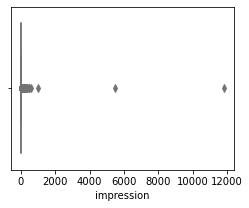

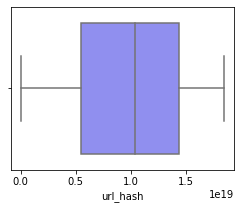

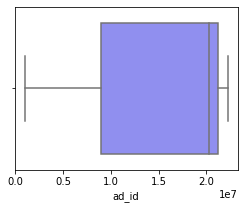

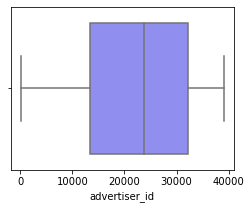

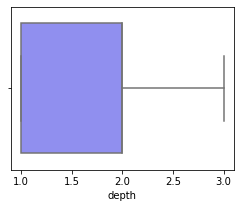

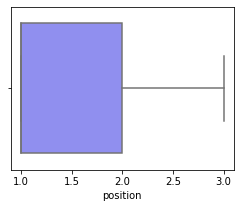

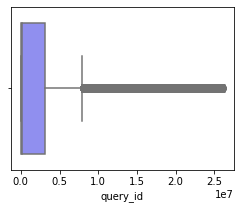

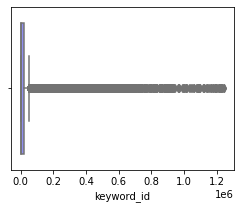

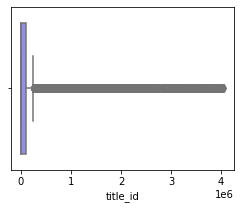

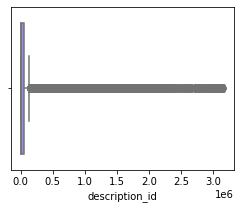

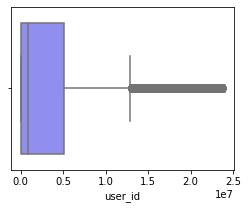

In [10]:
for i in data.columns:
    if i=="click":
        continue
    plt.figure(figsize=(4,3))
    ax = sns.boxplot(x=data[i],palette="cool")
    ax.set_xlabel(i,fontsize=10)
    plt.show()

In [11]:
## Splitting the dataset to x and y
X=data[['impression', 'url_hash', 'ad_id', 'advertiser_id', 'depth', 'position', 'query_id', 'keyword_id', 'title_id', 'description_id', 'user_id']] 
Y=data['click']

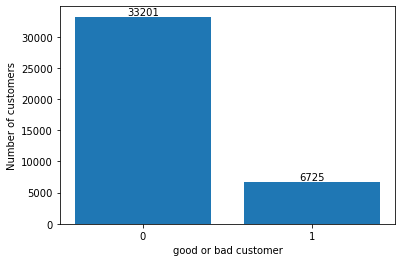

In [12]:
unique, counts = np.unique(Y, return_counts=True)
CountOfClasses=dict(zip(unique, counts))
fig, ax = plt.subplots()
bar=ax.bar(*zip(*CountOfClasses.items()))
plt.xticks([False,True])
plt.xlabel("good or bad customer")
plt.ylabel("Number of customers")
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

In [13]:
Gaussian =  EllipticEnvelope(contamination=0.2)
result=Gaussian.fit_predict(X)
Outliers=X[result==-1]
print("Number of detected outliers is " +str(len(Outliers)))

D:\Anaconda\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (265.400908425420425 > 265.380400334834519). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (262.392782173410694 > 262.094843483985244). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (275.290380653949342 > 270.537581314680097). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\covarian

D:\Anaconda\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (274.664664056489187 > 267.480356342366747). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (273.904405448965122 > 272.882067327424238). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (274.545705075387900 > 268.613899264042288). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\covarian

D:\Anaconda\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (269.104853497390536 > 267.039420727807226). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (265.564558984594271 > 265.031122957155617). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (265.564558984594271 > 264.984685181848704). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\covarian

D:\Anaconda\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (266.166341727322674 > 265.325404461422067). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (266.036982521764855 > 264.448360040549176). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (266.648582042468661 > 266.611029046549277). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\covarian

D:\Anaconda\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (272.245982030160178 > 272.242042893964253). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (268.069725107335216 > 268.049616525952558). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (268.089490708558401 > 268.009486322206442). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\covarian

D:\Anaconda\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (272.243280187891742 > 272.240469776811835). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (271.655373615749454 > 271.575928483381631). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\covariance\_robust_covariance.py:183: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (272.397398985731343 > 272.273750677381827). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn(
D:\Anaconda\lib\site-packages\sklearn\covarian

Number of detected outliers is 7984


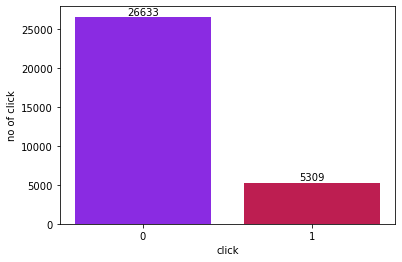

In [14]:
unique, counts = np.unique(Y[result!=-1], return_counts=True)
CountOfClasses=dict(zip(unique, counts))
fig, ax = plt.subplots()
bar=ax.bar(*zip(*CountOfClasses.items()),color=['blueviolet','#BD1E51'])
plt.xticks([False,True])
plt.xlabel("click")
plt.ylabel("no of click")
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

In [15]:
for x in range(3, 20, 2):
    KNN =  LocalOutlierFactor(n_neighbors=x)
    result2=KNN.fit_predict(X)
    Outliers=X[result2==-1]
    print(str(x)+": "+str(len(Outliers)))

3: 10326
5: 9814
7: 9502
9: 9423
11: 9177
13: 8977
15: 8968
17: 8925
19: 8943


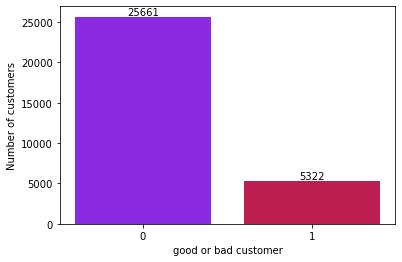

In [16]:
unique, counts = np.unique(Y[result2!=-1], return_counts=True)
CountOfClasses=dict(zip(unique, counts))
fig, ax = plt.subplots()
bar=ax.bar(*zip(*CountOfClasses.items()),color=['blueviolet','#BD1E51'])
plt.xticks([False,True])
plt.xlabel("good or bad customer")
plt.ylabel("Number of customers")
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

In [17]:
for x in range(1, 20, 2):
    IF =  IsolationForest(n_estimators=x,random_state = 42)
    result3=IF.fit_predict(X)
    Outliers=X[result3==-1]
    print(str(x)+": Number of detected outliers is " + ' ' + str(len(Outliers)))

1: Number of detected outliers is  14971
3: Number of detected outliers is  11065
5: Number of detected outliers is  11010
7: Number of detected outliers is  10836
9: Number of detected outliers is  10627
11: Number of detected outliers is  9217
13: Number of detected outliers is  8107
15: Number of detected outliers is  8265
17: Number of detected outliers is  8511
19: Number of detected outliers is  7985


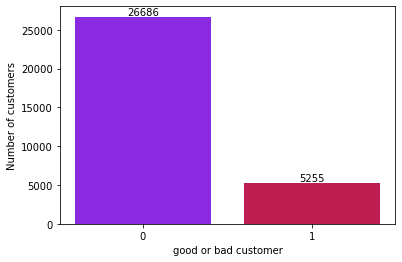

In [18]:

unique, counts = np.unique(Y[result3!=-1], return_counts=True)
CountOfClasses=dict(zip(unique, counts))
fig, ax = plt.subplots()
bar=ax.bar(*zip(*CountOfClasses.items()),color=['blueviolet','#BD1E51'])
plt.xticks([False,True])
plt.xlabel("good or bad customer")
plt.ylabel("Number of customers")
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

In [19]:
#NO OUTLIERS X AND Y
outlierx=X[result!=-1]
outliery=Y[result!=-1]

In [20]:
outlierx.describe()

,impression,url_hash,ad_id,advertiser_id,depth,position,query_id,keyword_id,title_id,description_id,user_id
count,31942.000000,3.194200e+04,3.194200e+04,31942.000000,31942.000000,31942.000000,3.194200e+04,3.194200e+04,3.194200e+04,3.194200e+04,3.194200e+04
mean,2.246040,1.148539e+19,1.603761e+07,22629.795880,1.946027,1.457235,3.189228e+06,3.370570e+04,1.662238e+05,1.062361e+05,3.724622e+06
std,73.573454,3.698195e+18,7.154129e+06,11403.833742,0.717184,0.628500,5.891145e+06,9.727926e+04,4.546493e+05,3.195947e+05,5.514441e+06
min,1.000000,4.372350e+18,1.000515e+06,82.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000,8.134264e+18,9.027437e+06,15332.000000,1.000000,1.000000,2.218750e+03,3.280000e+02,6.080000e+02,3.110000e+02,2.578250e+03
50%,1.000000,1.205788e+19,2.022250e+07,23808.000000,2.000000,1.000000,1.105755e+05,3.199000e+03,9.557000e+03,4.490500e+03,9.338010e+05
75%,1.000000,1.434039e+19,2.116251e+07,30128.000000,2.000000,2.000000,3.226726e+06,1.994900e+04,9.116925e+04,4.830475e+04,5.270300e+06
max,11820.000000,1.844094e+19,2.222734e+07,39074.000000,3.000000,3.000000,2.624010e+07,1.243163e+06,4.050208e+06,3.162659e+06,2.390734e+07


In [21]:
scaler = StandardScaler()
std_x=scaler.fit_transform(outlierx)

In [22]:
#split data 
#SCALED SPLIT
x_train, x_test, y_train, y_test = train_test_split(std_x, outliery,stratify=outliery, test_size=0.2,random_state=42)

# UnderSampling

In [23]:
overSampler = RandomUnderSampler(random_state=42)
RunderX1,RunderY1=overSampler.fit_resample(std_x, outliery)
X_train, X_test, y_train, y_test= train_test_split(RunderX1, RunderY1,stratify=RunderY1, test_size=0.3,random_state=42)

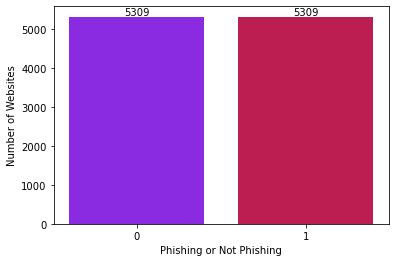

In [24]:
unique, counts = np.unique(RunderY1, return_counts=True)
CountOfClasses=dict(zip(unique, counts))
fig, ax = plt.subplots()
bar=ax.bar(*zip(*CountOfClasses.items()),color=['blueviolet','#BD1E51'])
plt.xticks([False,True])
plt.xlabel("Phishing or Not Phishing")
plt.ylabel("Number of Websites")
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

# Oversampling

In [25]:
overSampler = RandomOverSampler(random_state=42)
RoverX1,RoverY1=overSampler.fit_resample(std_x, outliery)
X_train, X_test, y_train, y_test= train_test_split(RoverX1, RoverY1,stratify=RoverY1, test_size=0.3,random_state=42)

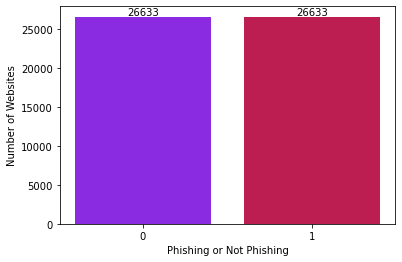

In [26]:
unique, counts = np.unique(RoverY1, return_counts=True)
CountOfClasses=dict(zip(unique, counts))
fig, ax = plt.subplots()
bar=ax.bar(*zip(*CountOfClasses.items()),color=['blueviolet','#BD1E51'])
plt.xticks([False,True])
plt.xlabel("Phishing or Not Phishing")
plt.ylabel("Number of Websites")
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

# SMOTE

In [27]:
oversample = SMOTE(random_state=42)
overX,overY=oversample.fit_resample(std_x, outliery)
x_train, x_test, y_train, y_test= train_test_split(overX, overY,stratify=overY, test_size=0.3,random_state=42)

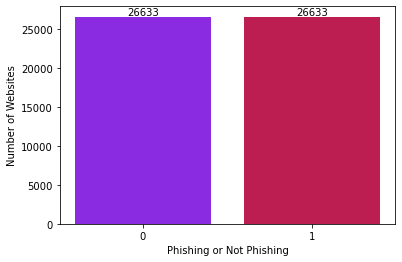

In [28]:
unique, counts = np.unique(overY, return_counts=True)
CountOfClasses=dict(zip(unique, counts))
fig, ax = plt.subplots()
bar=ax.bar(*zip(*CountOfClasses.items()),color=['blueviolet','#BD1E51'])
plt.xticks([False,True])
plt.xlabel("Phishing or Not Phishing")
plt.ylabel("Number of Websites")
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

### Adaboosting Ensemble Pipeline + Getting the best sampling technique

In [29]:
x_train1, x_test1, y_train1, y_test1= train_test_split(outlierx, outliery,stratify=outliery, test_size=0.3,random_state=42)
p=imbPipeline(steps=[('overSample',SMOTE(k_neighbors=7, random_state=42)),('Scaler', StandardScaler()),\
                ('model', AdaBoostClassifier(n_estimators=21, random_state=42))])
p.fit(x_train1,y_train1)
y_pred=p.predict(x_test1)
print("ACC of model: %.4f with IMPipeLine "%accuracy_score(y_pred,y_test1))

ACC of model: 0.7726 with IMPipeLine 


In [30]:
x_train1, x_test1, y_train1, y_test1= train_test_split(outlierx, outliery,stratify=outliery, test_size=0.3,random_state=42)
p=imbPipeline(steps=[('underSample',SMOTE(k_neighbors=7, random_state=42)),('Scaler', StandardScaler()),\
                ('model', AdaBoostClassifier(n_estimators=21, random_state=42))])
p.fit(x_train1,y_train1)
y_pred=p.predict(x_test1)
print("ACC of model: %.4f with IMPipeLine "%accuracy_score(y_pred,y_test1))

ACC of model: 0.7726 with IMPipeLine 


In [31]:
x_train1, x_test1, y_train1, y_test1= train_test_split(outlierx, outliery,stratify=outliery, test_size=0.3,random_state=42)
p=imbPipeline(steps=[('overSample',RandomOverSampler( random_state=42)),('Scaler', StandardScaler()),\
                ('model', AdaBoostClassifier(n_estimators=21, random_state=42))])
p.fit(x_train1,y_train1)
y_pred=p.predict(x_test1)
print("ACC of model: %.4f with IMPipeLine "%accuracy_score(y_pred,y_test1))

ACC of model: 0.6219 with IMPipeLine 


In [32]:
x_train1, x_test1, y_train1, y_test1= train_test_split(outlierx, outliery,stratify=outliery, test_size=0.3,random_state=42)
p=imbPipeline(steps=[('overSample',RandomUnderSampler( random_state=42)),('Scaler', StandardScaler()),\
                ('model', AdaBoostClassifier(n_estimators=21, random_state=42))])
p.fit(x_train1,y_train1)
y_pred=p.predict(x_test1)
print("ACC of model: %.4f with IMPipeLine "%accuracy_score(y_pred,y_test1))

ACC of model: 0.6017 with IMPipeLine 


### THUS PROVING SMOTE IS THE BEST METHOD FOR BALANCING THIS DATASET TOO!

In [33]:
x_train1, x_test1, y_train1, y_test1= train_test_split(outlierx, outliery,stratify=outliery, test_size=0.3,random_state=42)
p=imbPipeline(steps=[('overSample',SMOTE(k_neighbors=7, random_state=42)),('Scaler', StandardScaler()),\
                ('model', AdaBoostClassifier(n_estimators=21, random_state=42))])
p.fit(x_train1,y_train1)
y_pred=p.predict(x_test1)
print("ACC of model: %.4f with IMPipeLine "%accuracy_score(y_pred,y_test1))

ACC of model: 0.7726 with IMPipeLine 


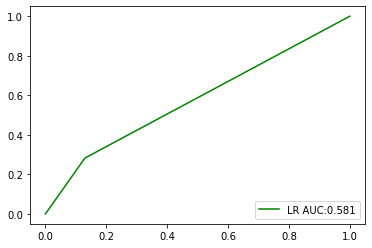

In [34]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
auc = roc_auc_score(y_pred, y_test1)

fpr, tpr, thresholds = roc_curve(y_test1, y_pred)
plt.plot(fpr, tpr, 'g-',label ='LR AUC:%.3f'%auc)

plt.legend(loc=4)
plt.show()

In [35]:
#Classification Report
print(classification_report(y_test1, y_pred, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86      7990
           1       0.30      0.28      0.29      1593

    accuracy                           0.77      9583
   macro avg       0.58      0.58      0.58      9583
weighted avg       0.77      0.77      0.77      9583



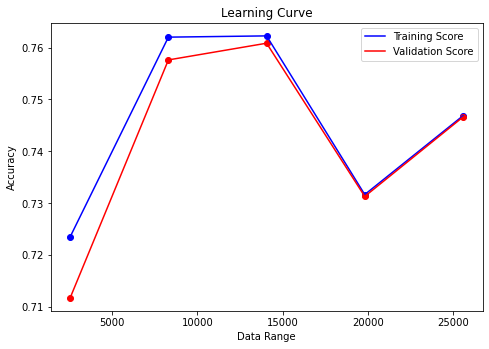

In [36]:
#Learning Curve
from sklearn.model_selection import learning_curve

train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(p, outlierx, outliery,cv=5,
                    scoring='accuracy',n_jobs=-1)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1), color='b')
ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1), color='r')
ax.plot(train_sizes_model,train_scores_model.mean(axis=1), color='b',label="Training Score") #Train=Blue
ax.plot(train_sizes_model,valid_scores_model.mean(axis=1), color='r', label="Validation Score") #Valid=Red
ax.set_xlabel('Data Range')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.legend(loc="best")
plt.show()

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


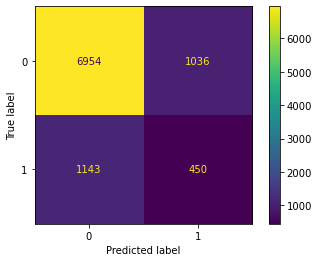

In [37]:
plot_confusion_matrix(p,x_test1,y_test1)

## Optimized Adaboosting Model from the Training file

In [38]:
#max_depth=6 (I made the learning rate=0.05 because its closer to 0 then 0.1)
adaBoost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=6), n_estimators=200, learning_rate=0.05, random_state=42)
adaBoost.fit(x_train, y_train)
y_pred = adaBoost.predict(x_test)

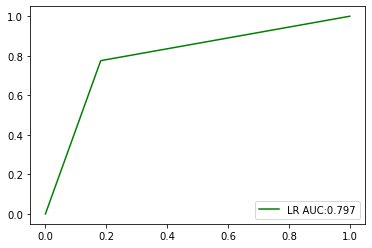

In [39]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
auc = roc_auc_score(y_pred, y_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, 'g-',label ='LR AUC:%.3f'%auc)

plt.legend(loc=4)
plt.show()

In [40]:
#Accuracy
print("Accuracy on training set: {:.3f}".format(adaBoost.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(adaBoost.score(x_test, y_test)))

Accuracy on training set: 0.866
Accuracy on test set: 0.797


In [41]:
#Classification Report
print(classification_report(y_test, y_pred, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      7990
           1       0.81      0.78      0.79      7990

    accuracy                           0.80     15980
   macro avg       0.80      0.80      0.80     15980
weighted avg       0.80      0.80      0.80     15980



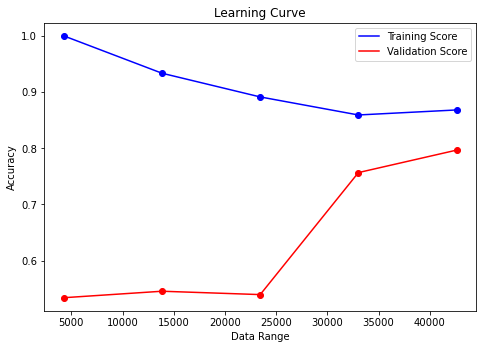

In [42]:
#Learning Curve
from sklearn.model_selection import learning_curve

train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(adaBoost, overX, overY,cv=5,
                    scoring='accuracy',n_jobs=-1)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1), color='b')
ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1), color='r')
ax.plot(train_sizes_model,train_scores_model.mean(axis=1), color='b',label="Training Score") #Train=Blue
ax.plot(train_sizes_model,valid_scores_model.mean(axis=1), color='r', label="Validation Score") #Valid=Red
ax.set_xlabel('Data Range')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.legend(loc="best")
plt.show()

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


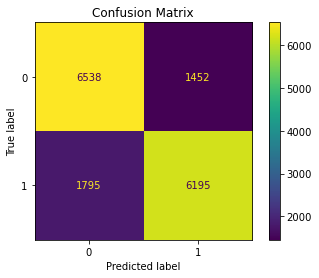

In [43]:
#Confusion Matrix
plot_confusion_matrix(adaBoost, x_test, y_test)  
plt.title('Confusion Matrix')
plt.show()

### Bagging Ensemble Model (Pipeline Model)

In [44]:
from sklearn.ensemble import BaggingClassifier

In [45]:
Bag_PL=imbPipeline(steps=[('overSample',SMOTE(random_state=42)),\
                ('model', BaggingClassifier(base_estimator = DecisionTreeClassifier(max_depth = 12,random_state=42),n_estimators=300,max_samples=800,random_state=42))])

Bag_PL.fit(x_train,y_train)

y_pred=Bag_PL.predict(x_test)
print("ACC of model: %.4f with IMPipeLine "%metrics.accuracy_score(y_pred,y_test))

ACC of model: 0.7424 with IMPipeLine 


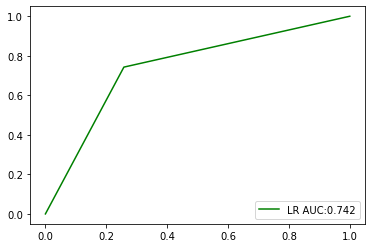

In [47]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
auc = roc_auc_score(y_pred, y_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, 'g-',label ='LR AUC:%.3f'%auc)

plt.legend(loc=4)
plt.show()

In [48]:
#Classification Report
print(classification_report(y_test, y_pred, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      7990
           1       0.74      0.74      0.74      7990

    accuracy                           0.74     15980
   macro avg       0.74      0.74      0.74     15980
weighted avg       0.74      0.74      0.74     15980



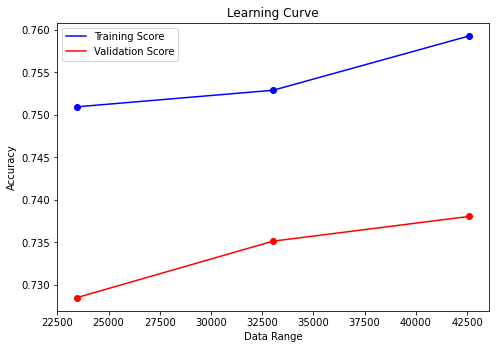

In [50]:
#Learning Curve
from sklearn.model_selection import learning_curve

train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(Bag_PL, overX, overY,cv=5,
                    scoring='accuracy',n_jobs=-1)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1), color='b')
ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1), color='r')
ax.plot(train_sizes_model,train_scores_model.mean(axis=1), color='b',label="Training Score") #Train=Blue
ax.plot(train_sizes_model,valid_scores_model.mean(axis=1), color='r', label="Validation Score") #Valid=Red
ax.set_xlabel('Data Range')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.legend(loc="best")
plt.show()

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


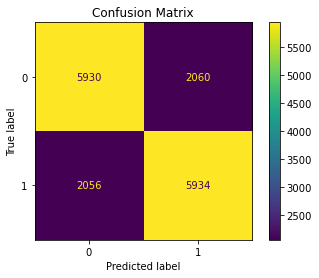

In [51]:
#Confusion Matrix
plot_confusion_matrix(Bag_PL, x_test, y_test)  
plt.title('Confusion Matrbix')
plt.show()

#### MSE: 0.043
#### Bias: 0.034
#### Variance: 0.008

### Bagging Ensemble Model (Training File Model)

In [53]:
DT_clf = DecisionTreeClassifier(max_depth = 12,random_state=42)

bag_clf = BaggingClassifier(
    base_estimator= DT_clf, n_estimators=300,
    max_samples=800, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(x_train, y_train)
y_pred_bag_s_nfs = bag_clf.predict(x_test)

In [54]:
print("ACC of model: %.4f with IMPipeLine "%metrics.accuracy_score(y_pred_bag_s_nfs,y_test))

ACC of model: 0.7424 with IMPipeLine 


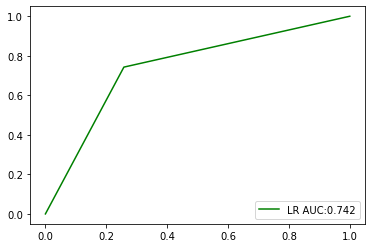

In [57]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
auc = roc_auc_score(y_pred_bag_s_nfs, y_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_bag_s_nfs)
plt.plot(fpr, tpr, 'g-',label ='LR AUC:%.3f'%auc)

plt.legend(loc=4)
plt.show()

In [56]:
#Classification Report
print(classification_report(y_test, y_pred_bag_s_nfs, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      7990
           1       0.74      0.74      0.74      7990

    accuracy                           0.74     15980
   macro avg       0.74      0.74      0.74     15980
weighted avg       0.74      0.74      0.74     15980



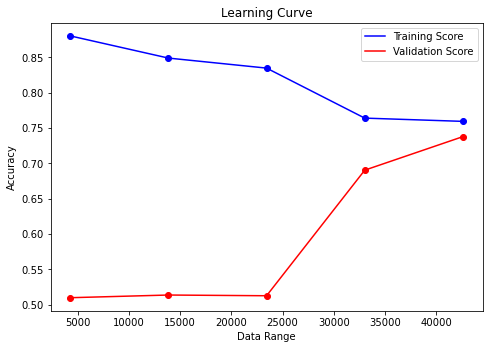

In [58]:
#Learning Curve
from sklearn.model_selection import learning_curve

train_sizes_model, train_scores_model, valid_scores_model, *_ =learning_curve(bag_clf, overX, overY,cv=5,
                    scoring='accuracy',n_jobs=-1)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(x=train_sizes_model,y= train_scores_model.mean(axis=1), color='b')
ax.scatter(x=train_sizes_model,y=valid_scores_model.mean(axis=1), color='r')
ax.plot(train_sizes_model,train_scores_model.mean(axis=1), color='b',label="Training Score") #Train=Blue
ax.plot(train_sizes_model,valid_scores_model.mean(axis=1), color='r', label="Validation Score") #Valid=Red
ax.set_xlabel('Data Range')
ax.set_ylabel('Accuracy')
ax.set_title('Learning Curve')
plt.legend(loc="best")
plt.show()

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


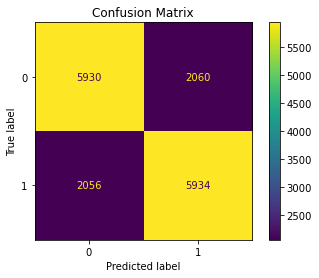

In [59]:
#Confusion Matrix
plot_confusion_matrix(Bag_PL, x_test, y_test)  
plt.title('Confusion Matrix')
plt.show()

#### MSE: 0.043
#### Bias: 0.034
#### Variance: 0.008